# Cleaning Transactions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
trans = pd.read_excel('Raw_data.xlsx' , sheet_name='Transactions')

In [3]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# Total Records 

In [5]:
print("Total records (rows) in the dataset : {}".format(trans.shape[0]))
print("Total columns (features) in the dataset : {}".format(trans.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


# Numeric and Non Numeric Columns 

In [6]:
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'list_price', 'standard_cost', 'product_first_sold_date'],
      dtype=object)

In [7]:
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['transaction_date', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'], dtype=object)

# Checking for Missing Values

In [8]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

# Online Order 

- As we can see only 1.8% of vlaues in the column is missing hence we can replace the missing values with the most common value in the column. Since this is a categorical column then it can either be yes or no. we can check that with mode and impute missing values with that

In [10]:
most_freq_online_mode = trans['online_order'].mode()
most_freq_online_mode

0    1.0
Name: online_order, dtype: float64

- We see that the most common is 1 which is yes so we replace the missing values with 1 

In [11]:
trans['online_order'].fillna(1, inplace=True)

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_31720\1996507654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trans['online_order'].fillna(1, inplace=True)


In [14]:
trans['online_order'].isnull().sum()

0

# Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

- We see that all the above columns have missing values but only compise of only around 1% of data hence we can drop these missing values

In [15]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [16]:
records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [17]:
trans.drop(index= records_to_drop, axis =0, inplace = True)

In [18]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

- Now we have no missing values in the data set 

# Profit 

- We create a new column called Profit 

In [19]:
trans['Profit'] = trans['list_price'] - trans['standard_cost']

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_31720\3093420622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trans['Profit'])


<Figure size 1500x800 with 0 Axes>

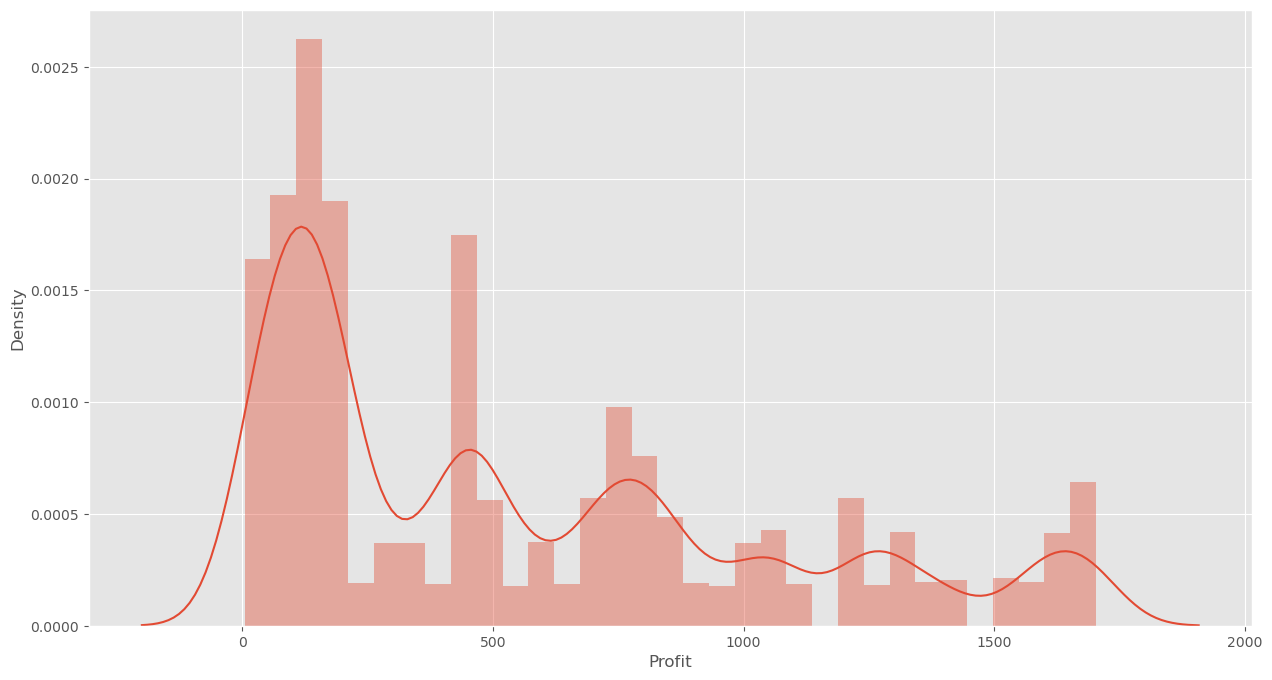

In [21]:
fig=plt.figure(figsize=(15,8))
sns.distplot(trans['Profit'])
plt.show()

# Inconsistency Check in Data
## Online order 

In [22]:
trans['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

- No inconsistancy

# Order Status

In [23]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

- No inconsistancies

# Product Line

In [24]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

- No inconsistancy

# Product Class

In [27]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

- no inconsitancy

# Product Size

In [28]:
trans['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

- No inconsistancy

# Brand

In [29]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

- No inconsistancy

# Duplication Check

In [31]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print('Number of records after removing customer_id (pk), duplicates : {}'.format(trans_dedupped.shape[0]))
print('Number of records in original dataset : {}'.format(trans.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


#  Exporting the Cleaned Transactions Data Set to csv

In [32]:
trans.to_csv('Transactions_Cleaned.csv', index=False)